In [1]:
import time
tStart = time.time()
tEnd = time.time()
print( (tEnd - tStart))
import json
import os
from datetime import datetime, timedelta
import Indicator as indx

0.0
0.0


In [2]:
def price_scale(price):
    if price<10:
        scale=0.01
    if price>=10 and price<50:
        scale=0.05
    if price>=50 and price<100:
        scale=0.1
    if price>=100 and price<500:
        scale=0.5
    if price>=500 and price<1000:
        scale=1
    if price>=1000:
        scale=5
    return scale

In [3]:
def save_plot(vwap_list,MA_list_short,MA_list_long,keypoint_buy_indices,keypoint_sell_indices,keypoint_buyEnd_indices,keypoint_sellEnd_indices, picPath):
    import matplotlib.pyplot as plt

    plt.cla()
    timestamps = [entry['timestamp'] for entry in vwap_list]
    vwap_values = [entry['vwap'] for entry in vwap_list]
    closeprice_values = [entry['closeprice'] for entry in vwap_list]
    #MA_list_short_values = [entry['MA'] for entry in MA_list_short]
    #MA_list_long_values = [entry['MA'] for entry in MA_list_long]
    MA_list_short_values = [entry['vwap'] for entry in MA_list_short]
    MA_list_long_values = [entry['vwap'] for entry in MA_list_long]

    plt.scatter(keypoint_buy_indices, [closeprice_values[i] for i in keypoint_buy_indices], color='red', label="整點")
    plt.scatter(keypoint_sell_indices, [closeprice_values[i] for i in keypoint_sell_indices], color='green', label="整點")
    plt.scatter(keypoint_buyEnd_indices, [closeprice_values[i] for i in keypoint_buyEnd_indices], color='black', label="整點")
    plt.scatter(keypoint_sellEnd_indices, [closeprice_values[i] for i in keypoint_sellEnd_indices], color='black', label="整點")

    plt.plot(timestamps, closeprice_values, color='lightgray')
    plt.plot(timestamps, MA_list_short_values, color='purple')
    plt.plot(timestamps, MA_list_long_values, color='blue')
    plt.plot(timestamps, vwap_values, color='orange')

    plt.xlabel('Timestamp')
    #plt.ylabel('VWAP')
    plt.ylabel('closeprice_values')
    plt.ylabel('vwap_values')
    plt.title('VWAP over Time')

    plt.savefig(picPath)
    #plt.show()

In [4]:
def save_plot2(vwap_list,keypoint_crossline_indices,keypoint_uppershadowline_indices,keypoint_downshadowline_indices,keypoint_support_Pressure_indices, picPath):
    import matplotlib.pyplot as plt

    plt.cla()
    timestamps = [entry['timestamp'] for entry in vwap_list]
    vwap_values = [entry['vwap'] for entry in vwap_list]
    closeprice_values = [entry['closeprice'] for entry in vwap_list]


    plt.scatter(keypoint_crossline_indices, [closeprice_values[i] for i in keypoint_crossline_indices], color='yellow', marker="+")
    plt.scatter(keypoint_uppershadowline_indices, [closeprice_values[i] for i in keypoint_uppershadowline_indices], color='green', marker="2")
    plt.scatter(keypoint_downshadowline_indices, [closeprice_values[i] for i in keypoint_downshadowline_indices], color='red', marker="1")
    if keypoint_support_Pressure_indices!=[]:
        for i in keypoint_support_Pressure_indices:
            plt.axhline(y=i, color='red')
    
    plt.plot(timestamps, closeprice_values, color='lightgray')
    plt.plot(timestamps, vwap_values, color='orange')

    plt.xlabel('Timestamp')
    #plt.ylabel('VWAP')
    plt.ylabel('closeprice_values')
    plt.ylabel('vwap_values')
    plt.title('VWAP over Time')

    plt.savefig(picPath)
    #plt.show()

In [5]:
def StockValue_File_Get(StockValue_File):
    #StockValue_File='F:\\文義\\股票資料\\股票歷史資料\\股票成交量值排行\\'
    datetime_now=str(datetime.now())
    file=datetime_now[0:10]+'_value.json'
    #file='2024-10-25_value.json'
    jsonFile = open(StockValue_File+file,'r')
    r = jsonFile.read()
    data= json.JSONDecoder().decode(r)

    StockID_filter=[]
    Stock_name_filter=[]
    for i in range(len(data['data'])):
        StockID=data['data'][i]['symbol']
        Stock_name=data['data'][i]['name']
        if i<100:
            StockID_filter.append(StockID)
            Stock_name_filter.append(Stock_name)
    return StockID_filter,Stock_name_filter

In [6]:
def save_json_data(tempdata,Filepath):
    json_data = json.dumps(tempdata, indent=4)
    with open(Filepath, "w") as json_file:
        json_file.write(json_data)

In [7]:
#ABCD型態
#多頭旗形動能
#動能搶帽策略
#反轉交易(底部&頭部) ***
#移動平均趨勢交易
#VWAP交易  ***
#支撐或壓力交易 ***
#紅轉綠交易


#每日特定時間交易
#發展自己的策略
#技術指標只是指標,不是命令




In [8]:
# import Indicator as indx
import json
Path='F:\\文義\\股票資料\\股票歷史資料\\股票價格Ｋ線(即時)\\台積電\\2330_2024-03-01.json'
#Path='F:\\文義\\股票資料\\股票歷史資料\\股票價格Ｋ線(即時)\\鴻海\\2317_2024-03-13.json'

In [9]:
Path.replace('股票價格Ｋ線(即時)','策略\\VWAP')    

'F:\\文義\\股票資料\\股票歷史資料\\策略\\VWAP\\台積電\\2330_2024-03-01.json'

In [10]:
StockValue_File='D:\\TW056881n\\STOCK\\股票歷史資料\\股票成交量值排行\\'
StockValue_File='F:\\文義\\NB\\TW056881n\\STOCK\\股票歷史資料\\股票成交量值排行\\'
StockID_filter,Stock_name_filter=StockValue_File_Get(StockValue_File)

In [24]:
StockName='台積電'
StockID='2330'
Path='D:\\TW056881n\\STOCK\\股票歷史資料\\股票價格Ｋ線\\'+StockName+'\\D\\'
Path='F:\\文義\\NB\\TW056881n\\STOCK\\股票歷史資料\\股票價格Ｋ線\\'+StockName+'\\D\\'
file_list=[StockID+'_2024.json',StockID+'_2023.json',StockID+'_2022.json',StockID+'_2021.json',StockID+'_2020.json',StockID+'_2019.json',StockID+'_2018.json',StockID+'_2017.json',StockID+'_2016.json',StockID+'_2015.json']
data_all={}
for file in file_list:
    jsonFile = open(Path+file,'r')
    r = jsonFile.read()
    data= json.JSONDecoder().decode(r)
    if data_all=={}:
        data_all=data
    else:
        for i in range(len(data['data'])):
            data_all['data'].append(data['data'][i])

Filepath=Path+StockID+'_ALL.json'
save_json_data(data_all,Filepath)           

In [25]:
data

{'symbol': '2330',
 'type': 'EQUITY',
 'exchange': 'TWSE',
 'market': 'TSE',
 'timeframe': 'D',
 'data': [{'date': '2015-12-31',
   'open': 142,
   'high': 144,
   'low': 141,
   'close': 143,
   'volume': 18677987,
   'change': 0.5},
  {'date': '2015-12-30',
   'open': 142.5,
   'high': 144,
   'low': 142,
   'close': 142.5,
   'volume': 14713096,
   'change': 0.5},
  {'date': '2015-12-29',
   'open': 143.5,
   'high': 144,
   'low': 141.5,
   'close': 142,
   'volume': 12968379,
   'change': -1.5},
  {'date': '2015-12-28',
   'open': 143.5,
   'high': 144,
   'low': 143,
   'close': 143.5,
   'volume': 10831155,
   'change': 0.5},
  {'date': '2015-12-25',
   'open': 142,
   'high': 143.5,
   'low': 142,
   'close': 143,
   'volume': 6168635,
   'change': 1},
  {'date': '2015-12-24',
   'open': 143,
   'high': 143.5,
   'low': 142,
   'close': 142,
   'volume': 13495395,
   'change': 0.5},
  {'date': '2015-12-23',
   'open': 141,
   'high': 143,
   'low': 140.5,
   'close': 141.5,
   

台積電
peaks_flag
2015-07-23
close:136 ,MA_short:139.87861065268072 ,MA_long:143.0546387380047 ,vwap:145.19790252778716 ,MA_short_pre:140.21002472239238 ,MA_long_pre:143.42593391165883
valleys_flag
2015-12-01
close:142.5 ,MA_short:139.98089858319855 ,MA_long:135.39039043513623 ,vwap:134.13387049539486 ,MA_short_pre:139.85694677448103 ,MA_long_pre:135.15171937228803
valleys_flag
2016-02-17
close:148 ,MA_short:140.12990076927895 ,MA_long:139.73982037311723 ,vwap:135.28304706394204 ,MA_short_pre:139.45961251728613 ,MA_long_pre:139.52281254554313
valleys_flag
2016-06-13
close:162 ,MA_short:155.27625067951908 ,MA_long:154.69300374906553 ,vwap:148.85281413090658 ,MA_short_pre:153.8038859311046 ,MA_long_pre:154.51239158357015
valleys_flag
2016-06-17
close:163 ,MA_short:158.26461605622654 ,MA_long:154.8349581128021 ,vwap:149.53503048425085 ,MA_short_pre:157.47175231746758 ,MA_long_pre:154.77132871743888
valleys_flag
2016-06-30
close:162.5 ,MA_short:161.13007337176785 ,MA_long:155.13924546648352 ,

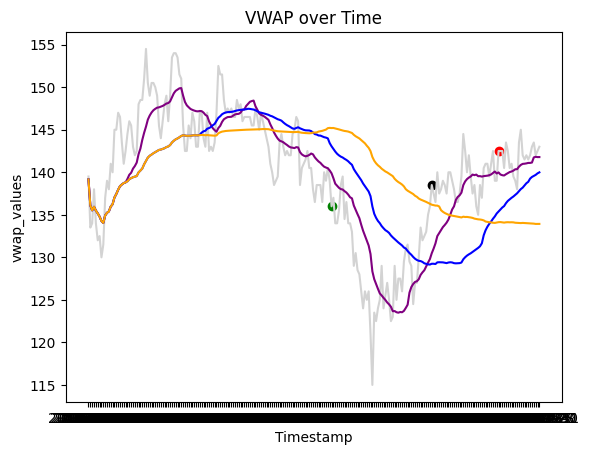

In [28]:
#VWAP交易
#價格向VWAP靠攏,壓力與支撐得到確認
#停損:5MA收盤價跌破VWAP
#停利:1.價格觸及獲利目標 2.價格抵達下一個壓力或支撐 (先用15分MA的轉折當峰點) 
#部位配置:1.價格抵達下一個壓力或支撐結束半部部位 (5分與15分MA交叉當轉折點;取diff_vwap最大值的平均) 2.其餘留至損益兩平 

#取得2015~2024校正後的VWAP
for index in range(len(StockID_filter)):
    StockID=StockID_filter[index]
    StockName=Stock_name_filter[index]
    if StockName!='台積電': continue
    Path='D:\\TW056881n\\STOCK\\股票歷史資料\\股票價格Ｋ線\\'+StockName+'\\D\\'
    Path='F:\\文義\\NB\\TW056881n\\STOCK\\股票歷史資料\\股票價格Ｋ線\\'+StockName+'\\D\\'
    file_list=[StockID+'_ALL.json']
    
    print(StockName)
    #diff_vwap_rate_threshold=0.7
    vwap_K_short=20
    vwap_K_long=60
    vwap_K_quarterly=60
    vwap_K_cycle=120
    
    MA_K_short=5
    MA_K_long=15
    
    BuyFlag=False
    BuyEndFlag=False
    SellFlag=False
    SellEndFlag=False

    profit=0
    profit_all=0
    profit_count=0
    loss_count=0
    profit_list=[]
    
    for file in file_list:
        if not os.path.exists(Path+file):continue
        jsonFile = open(Path+file,'r')
        r = jsonFile.read()
        data= json.JSONDecoder().decode(r)
        if len(data)<3:continue
        data['data'].reverse()
        vwap_list=indx.calculate_vwap_adjust(data,vwap_K_cycle)
        MA_list_short=indx.calculate_vwap_adjust(data,vwap_K_short)
        MA_list_long=indx.calculate_vwap_adjust(data,vwap_K_long)
        #MA_list_short=indx.calculate_ma(data,MA_K_short)
        #MA_list_long=indx.calculate_ma(data,MA_K_long)
        
        vwap_indicator_list=[]
        keypoint_buy_indices=[]
        keypoint_sell_indices=[]
        keypoint_buy_indices_date=[]
        keypoint_sell_indices_date=[]
        keypoint_buyEnd_indices=[]
        keypoint_sellEnd_indices=[]
        keypoint_buyEnd_indices_date=[]
        keypoint_sellEnd_indices_date=[]
        for i in range(len(data['data'])-1):
            #print(i)
            if i<=MA_K_long:continue
            close=data['data'][i]['close']
            diff_vwap_rate_threshold=close*0.1 #半根停板的距離當基準
            vwap=vwap_list[i]['vwap']
            if vwap_list[i]['vwap']-vwap_list[i-1]['vwap']>0:
                vwap_trend='UP'
            else:
                vwap_trend='Down'
    
            diff_vwap=(close-vwap)
            diff_vwap_rate=(close-vwap)/close*100
            #print('close:'+str(close))
            #print('diff_vwap_rate_threshold:'+str(diff_vwap_rate_threshold)+' ,diff_vwap_rate:'+str(diff_vwap_rate))
    
            if diff_vwap>0 and vwap_trend=='UP':
                vwap_indicator='support'
    
            if diff_vwap<0 and vwap_trend=='Down':
                vwap_indicator='resistance'
    
            if diff_vwap>0 and vwap_trend=='Down':
                vwap_indicator='unknown'
    
            if diff_vwap<0 and vwap_trend=='UP':
                vwap_indicator='unknown'
    
            #MA_short_pre=MA_list_short[i-1]['MA']
            #MA_long_pre=MA_list_long[i-1]['MA']
            #MA_short=MA_list_short[i]['MA']
            #MA_long=MA_list_long[i]['MA']
            MA_short_pre=MA_list_short[i-1]['vwap']
            MA_long_pre=MA_list_long[i-1]['vwap']
            MA_short=MA_list_short[i]['vwap']
            MA_long=MA_list_long[i]['vwap']
    
            #支撐確認(先用5分與15分MA當轉折點,價格站上當5分與15分MA並且多頭排列,vwap朝上) 
            if abs(diff_vwap)<diff_vwap_rate_threshold and vwap_indicator=='support':
                if close>MA_short and MA_short>MA_long and MA_long>vwap and MA_short>MA_short_pre and MA_long>=MA_long_pre:
                    if BuyFlag==False:
                        BuyFlag=True
                        print('valleys_flag')
                        keypoint_buy_indices.append(i)
                        keypoint_buy_indices_date.append(data['data'][i]['date'])
                        keypoint_buy_indices_value=close
                        print(data['data'][i]['date'])
                        print('close:'+str(close)+' ,MA_short:'+str(MA_short)+' ,MA_long:'+str(MA_long)+' ,vwap:'+str(vwap)+' ,MA_short_pre:'+str(MA_short_pre)+' ,MA_long_pre:'+str(MA_long_pre))
    
            #壓力確認(先用5分與15分MA當轉折點,價格跌破當5分與15分MA並且空頭排列,vwap朝下) 
            if abs(diff_vwap)<diff_vwap_rate_threshold and vwap_indicator=='resistance':
                if close<MA_short and MA_short<MA_long and MA_long<vwap and MA_short<MA_short_pre and MA_long<=MA_long_pre:
                    if SellFlag==False:
                        SellFlag=True
                        print('peaks_flag')
                        keypoint_sell_indices.append(i)
                        keypoint_sell_indices_date.append(data['data'][i]['date'])
                        keypoint_sell_indices_value=close
                        print(data['data'][i]['date'])
                        print('close:'+str(close)+' ,MA_short:'+str(MA_short)+' ,MA_long:'+str(MA_long)+' ,vwap:'+str(vwap)+' ,MA_short_pre:'+str(MA_short_pre)+' ,MA_long_pre:'+str(MA_long_pre))

            #賣出訊號
            if BuyFlag==True:
                if MA_short<vwap: #停損:5MA收盤價跌破VWAP
                    BuyFlag=False

                if  MA_long<=MA_long_pre: #停利:1.價格觸及獲利目標 2.價格抵達下一個壓力或支撐 (先用15分MA的轉折當峰點) 
                    BuyFlag=False

                if BuyFlag==False:
                    keypoint_buyEnd_indices.append(i)
                    keypoint_buyEnd_indices_date.append(data['data'][i]['date'])
                    profit=close-keypoint_buy_indices_value
                    profit_all=profit_all+profit
                    profit_list.append(profit)
                    if profit>0:
                        profit_count=profit_count+1
                    else:
                        loss_count=loss_count+1

            if SellFlag==True:
                if MA_short>vwap: #停損:5MA收盤價跌破VWAP
                    SellFlag=False
                    
                if  MA_long>=MA_long_pre: #停利:1.價格觸及獲利目標 2.價格抵達下一個壓力或支撐 (先用15分MA的轉折當峰點) 
                    SellFlag=False
                    
                if SellFlag==False:
                    keypoint_sellEnd_indices.append(i)
                    keypoint_sellEnd_indices_date.append(data['data'][i]['date'])
                    profit=keypoint_sell_indices_value-close
                    profit_all=profit_all+profit
                    profit_list.append(profit)
                    if profit>0:
                        profit_count=profit_count+1
                    else:
                        loss_count=loss_count+1
        
        st_Path=Path.replace('股票價格Ｋ線','策略\\VWAP')    
        #st_Path=st_Path.replace(StockName,'')
        if not os.path.exists(st_Path):os.makedirs(st_Path)
        save_plot(vwap_list,MA_list_short,MA_list_long,keypoint_buy_indices,keypoint_sell_indices,keypoint_buyEnd_indices,keypoint_sellEnd_indices,st_Path+StockName+'_'+file.replace('_ALL.json','_ALL_adjust.jpg'))

        print('profit_all:'+str(profit_all))
        print('profit_count:'+str(profit_count))
        print('loss_count:'+str(loss_count))
        
        file_list=[StockID+'_2024.json',StockID+'_2023.json',StockID+'_2022.json',StockID+'_2021.json',StockID+'_2020.json',StockID+'_2019.json',StockID+'_2018.json',StockID+'_2017.json',StockID+'_2016.json',StockID+'_2015.json']
        for  file in file_list:
            if not os.path.exists(Path+file):continue
            #print(file)
            byyear=file.split('_')[1][0:4]
            MA_list_short_byyear=[]
            for item in MA_list_short:
                if byyear in item['timestamp']:
                    MA_list_short_byyear.append(item)
            MA_list_long_byyear=[]
            for item in MA_list_long:
                if byyear in item['timestamp']:
                    MA_list_long_byyear.append(item)
            vwap_list_byyear=[]
            keypoint_buy_indices=[]
            keypoint_sell_indices=[]
            keypoint_buyEnd_indices=[]
            keypoint_sellEnd_indices=[]
            for i in range(len(vwap_list)):
                if byyear in vwap_list[i]['timestamp']:
                    vwap_list_byyear.append(vwap_list[i])
            for i in range(len(vwap_list_byyear)):
                if vwap_list_byyear[i]['timestamp'] in  keypoint_buy_indices_date:
                    keypoint_buy_indices.append(i)
                if vwap_list_byyear[i]['timestamp'] in  keypoint_sell_indices_date:
                    keypoint_sell_indices.append(i)
                if vwap_list_byyear[i]['timestamp'] in  keypoint_buyEnd_indices_date:
                    keypoint_buyEnd_indices.append(i)
                if vwap_list_byyear[i]['timestamp'] in  keypoint_sellEnd_indices_date:
                    keypoint_sellEnd_indices.append(i)

            save_plot(vwap_list_byyear,MA_list_short_byyear,MA_list_long_byyear,keypoint_buy_indices,keypoint_sell_indices,keypoint_buyEnd_indices,keypoint_sellEnd_indices,st_Path+StockName+'_'+str(vwap_K_cycle)+'_'+file.replace('.json','.jpg'))
            

In [23]:
Path+file

'F:\\文義\\NB\\TW056881n\\STOCK\\股票歷史資料\\股票價格Ｋ線\\台積電\\D\\2330_ALL.json'

In [16]:
len(vwap_list)

202

In [21]:
data

{'symbol': '2330',
 'type': 'EQUITY',
 'exchange': 'TWSE',
 'market': 'TSE',
 'timeframe': 'D',
 'data': [{'date': '2024-01-02',
   'open': 590,
   'high': 593,
   'low': 589,
   'close': 593,
   'volume': 27997826,
   'change': 0},
  {'date': '2024-01-03',
   'open': 584,
   'high': 585,
   'low': 576,
   'close': 578,
   'volume': 40134497,
   'change': -15},
  {'date': '2024-01-04',
   'open': 580,
   'high': 581,
   'low': 577,
   'close': 580,
   'volume': 18063758,
   'change': 2},
  {'date': '2024-01-05',
   'open': 578,
   'high': 580,
   'low': 574,
   'close': 576,
   'volume': 22008878,
   'change': -4},
  {'date': '2024-01-08',
   'open': 582,
   'high': 585,
   'low': 579,
   'close': 583,
   'volume': 19270119,
   'change': 7},
  {'date': '2024-01-09',
   'open': 588,
   'high': 589,
   'low': 583,
   'close': 586,
   'volume': 23718766,
   'change': 3},
  {'date': '2024-01-10',
   'open': 581,
   'high': 586,
   'low': 580,
   'close': 584,
   'volume': 13708117,
   'cha

In [20]:
indx.calculate_vwap_adjust(data,vwap_K_cycle)

[{'timestamp': '2024-01-02', 'vwap': 591.6666666666666, 'closeprice': 593},
 {'timestamp': '2024-01-03', 'vwap': 584.597863743273, 'closeprice': 578},
 {'timestamp': '2024-01-04', 'vwap': 583.4945977687005, 'closeprice': 580},
 {'timestamp': '2024-01-05', 'vwap': 582.1057972552502, 'closeprice': 576},
 {'timestamp': '2024-01-08', 'vwap': 582.1401933691435, 'closeprice': 583},
 {'timestamp': '2024-01-09', 'vwap': 582.7457064499706, 'closeprice': 586},
 {'timestamp': '2024-01-10', 'vwap': 582.7945552206015, 'closeprice': 584},
 {'timestamp': '2024-01-11', 'vwap': 583.2575943337271, 'closeprice': 586},
 {'timestamp': '2024-01-12', 'vwap': 583.3477750577212, 'closeprice': 584},
 {'timestamp': '2024-01-15', 'vwap': 583.6921248467586, 'closeprice': 586},
 {'timestamp': '2024-01-16', 'vwap': 583.541821172992, 'closeprice': 580},
 {'timestamp': '2024-01-17', 'vwap': 583.1551567770349, 'closeprice': 581},
 {'timestamp': '2024-01-18', 'vwap': 583.6004716780719, 'closeprice': 588},
 {'timestamp':

In [30]:
#VWAP交易
#價格向VWAP靠攏,壓力與支撐得到確認
#停損:5MA收盤價跌破VWAP
#停利:1.價格觸及獲利目標 2.價格抵達下一個壓力或支撐 (先用15分MA的轉折當峰點) 
#部位配置:1.價格抵達下一個壓力或支撐結束半部部位 (5分與15分MA交叉當轉折點;取diff_vwap最大值的平均) 2.其餘留至損益兩平 

#取得2015~2024間,校正前 VWAP
for index in range(len(StockID_filter)):
    StockID=StockID_filter[index]
    StockName=Stock_name_filter[index]
    #if StockName!='台積電': continue
    Path='D:\\TW056881n\\STOCK\\股票歷史資料\\股票價格Ｋ線\\'+StockName+'\\D\\'
    file_list=[StockID+'_ALL.json']
    
    print(StockName)
    #diff_vwap_rate_threshold=0.7
    MA_K_short=5
    MA_K_long=15
    
    for file in file_list:
        if not os.path.exists(Path+file):continue
        jsonFile = open(Path+file,'r')
        r = jsonFile.read()
        data= json.JSONDecoder().decode(r)
        if len(data)<3:continue
        data['data'].reverse()        
        vwap_list=indx.calculate_vwap(data)
        MA_list_short=indx.calculate_ma(data,MA_K_short)
        MA_list_long=indx.calculate_ma(data,MA_K_long)
        vwap_indicator_list=[]
        keypoint_buy_indices=[]
        keypoint_sell_indices=[]
        for i in range(len(data['data'])-1):
            #print(i)
            if i<=MA_K_long:continue
            close=data['data'][i]['close']
            diff_vwap_rate_threshold=close*0.05 #半根停板的距離當基準
            vwap=vwap_list[i]['vwap']
            if vwap_list[i]['vwap']-vwap_list[i-1]['vwap']>0:
                vwap_trend='UP'
            else:
                vwap_trend='Down'
    
            diff_vwap=(close-vwap)
            diff_vwap_rate=(close-vwap)/close*100
            #print('close:'+str(close))
            #print('diff_vwap_rate_threshold:'+str(diff_vwap_rate_threshold)+' ,diff_vwap_rate:'+str(diff_vwap_rate))
    
            if diff_vwap>0 and vwap_trend=='UP':
                vwap_indicator='support'
    
            if diff_vwap<0 and vwap_trend=='Down':
                vwap_indicator='resistance'
    
            if diff_vwap>0 and vwap_trend=='Down':
                vwap_indicator='unknown'
    
            if diff_vwap<0 and vwap_trend=='UP':
                vwap_indicator='unknown'
    
            MA_short_pre=MA_list_short[i-1]['MA']
            MA_long_pre=MA_list_long[i-1]['MA']
            MA_short=MA_list_short[i]['MA']
            MA_long=MA_list_long[i]['MA']
    
            #支撐確認(先用5分與15分MA當轉折點,價格站上當5分與15分MA並且多頭排列,vwap朝上) 
            if abs(diff_vwap_rate)<diff_vwap_rate_threshold and vwap_indicator=='support':
                if close>MA_short and MA_short>MA_long and MA_long>vwap and MA_short>MA_short_pre and MA_long>=MA_long_pre:
                    print('valleys_flag')
                    keypoint_buy_indices.append(i)
                    print(i)
                    print('close:'+str(close)+' ,MA_short:'+str(MA_short)+' ,MA_long:'+str(MA_long)+' ,vwap:'+str(vwap)+' ,MA_short_pre:'+str(MA_short_pre)+' ,MA_long_pre:'+str(MA_long_pre))
    
            #壓力確認(先用5分與15分MA當轉折點,價格跌破當5分與15分MA並且空頭排列,vwap朝下) 
            if abs(diff_vwap_rate)<diff_vwap_rate_threshold and vwap_indicator=='resistance':
                if close<MA_short and MA_short<MA_long and MA_long<vwap and MA_short<MA_short_pre and MA_long<=MA_long_pre:
                    print('peaks_flag')
                    keypoint_sell_indices.append(i)
                    print(i)
                    print('close:'+str(close)+' ,MA_short:'+str(MA_short)+' ,MA_long:'+str(MA_long)+' ,vwap:'+str(vwap)+' ,MA_short_pre:'+str(MA_short_pre)+' ,MA_long_pre:'+str(MA_long_pre))
                    
        
        st_Path=Path.replace('股票價格Ｋ線','策略\\VWAP')    
        #st_Path=st_Path.replace(StockName,'')
        if not os.path.exists(st_Path):os.makedirs(st_Path)
        save_plot(vwap_list,MA_list_short,MA_list_long,keypoint_buy_indices,keypoint_sell_indices,st_Path+StockName+'_'+file.replace('.json','.jpg'))
        

台積電
valleys_flag
17
close:146.5 ,MA_short:144.7 ,MA_long:138.43333333333334 ,vwap:138.36278333653595 ,MA_short_pre:143.6 ,MA_long_pre:137.6
valleys_flag
23
close:145.5 ,MA_short:143.9 ,MA_long:142.76666666666668 ,vwap:139.30780743032423 ,MA_short_pre:143.5 ,MA_long_pre:141.83333333333334
valleys_flag
27
close:148 ,MA_short:144.2 ,MA_long:144.13333333333333 ,vwap:139.98501788113813 ,MA_short_pre:143.8 ,MA_long_pre:143.66666666666666
valleys_flag
28
close:148.5 ,MA_short:144.8 ,MA_long:144.7 ,vwap:140.20165464224888 ,MA_short_pre:144.2 ,MA_long_pre:144.13333333333333
valleys_flag
29
close:148.5 ,MA_short:145.9 ,MA_long:144.93333333333334 ,vwap:140.43688816844528 ,MA_short_pre:144.8 ,MA_long_pre:144.7
valleys_flag
30
close:151 ,MA_short:147.7 ,MA_long:145.33333333333334 ,vwap:140.93973221501622 ,MA_short_pre:145.9 ,MA_long_pre:144.93333333333334
valleys_flag
45
close:153.5 ,MA_short:149.1 ,MA_long:149.0 ,vwap:143.50330748354918 ,MA_short_pre:147.6 ,MA_long_pre:148.83333333333334
valleys_f

TypeError: save_plot() missing 2 required positional arguments: 'keypoint_sellEnd_indices_date' and 'picPath'

In [105]:
profit_list

[1.0,
 -5.0,
 -8.0,
 9,
 -3.5,
 -1.0,
 -5.5,
 5.5,
 -1,
 -2,
 2.5,
 -11.5,
 0,
 -10.0,
 -2,
 3.5,
 -15.5,
 -1,
 -12,
 -3,
 -2.5,
 -6.5,
 -3.5,
 48,
 -4,
 133.5,
 -16,
 -22,
 0,
 -6,
 -24,
 -33,
 -3,
 -6,
 -1,
 4,
 -6,
 14,
 14,
 88,
 0.0,
 -10,
 66,
 -2,
 -5,
 1,
 3,
 0,
 -5,
 124,
 120,
 -21]

2330_2024-02-29.json
2330_2024-02-28.json
2330_2024-02-27.json
2330_2024-02-26.json
2330_2024-02-25.json
2330_2024-02-24.json
2330_2024-02-23.json
[]
2330_2024-03-03.json
2330_2024-03-02.json
2330_2024-03-01.json
[697, 697, 689, 688]
2330_2024-02-29.json
2330_2024-02-28.json
2330_2024-02-27.json
2330_2024-02-26.json
[688, 697, 689]
2330_2024-03-04.json
[725, 714, 725, 711]
2330_2024-03-03.json
2330_2024-03-02.json
2330_2024-03-01.json
[697, 697, 689, 688]
2330_2024-02-29.json
2330_2024-02-28.json
2330_2024-02-27.json
[711, 714, 688, 689, 725, 697]
crossline real_line:0 ,upper_line:2 ,lower_line:2
2330_2024-03-05.json
[738, 735, 730, 728]
2330_2024-03-04.json
[725, 714, 725, 711]
2330_2024-03-03.json
2330_2024-03-02.json
2330_2024-03-01.json
[697, 697, 689, 688]
2330_2024-02-29.json
2330_2024-02-28.json
[738, 711, 714, 688, 689, 725, 728, 697, 730, 735]
uppershadow real_line:1 ,upper_line:4 ,lower_line:1
uppershadow real_line:1 ,upper_line:4 ,lower_line:1
uppershadow real_line:3 ,upper_

KeyboardInterrupt: 

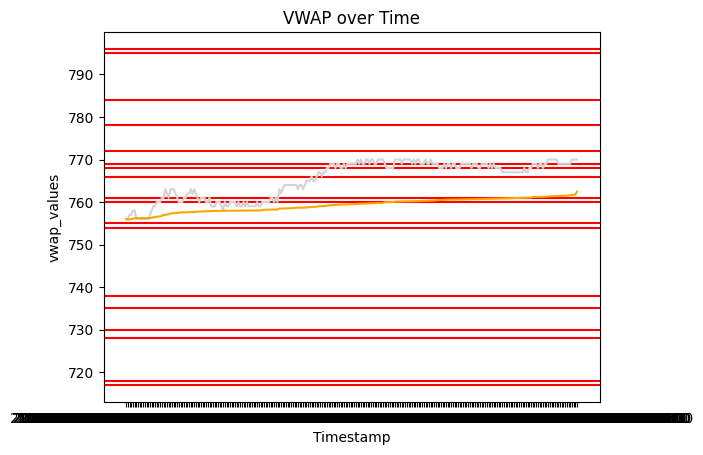

In [455]:
#支撐或壓力交易
#出現猶豫不決的線形表示支撐或壓力 (1分K盤整5次以上,形成小十字線(實體小於上下引線))
#整數關卡價位(小於100-->0.5,1 大於100-->,5,10)
#最近價格形成的支撐或壓力 (看前一天的開盤,收盤,最高,最低) (如果前幾天是盤整趨勢,整理三天內)

Path='F:\\文義\\股票資料\\股票歷史資料\\股票價格Ｋ線(即時)\\台積電\\'
file_list=['2330_2024-03-01.json','2330_2024-03-04.json','2330_2024-03-05.json','2330_2024-03-06.json','2330_2024-03-07.json','2330_2024-03-08.json','2330_2024-03-11.json','2330_2024-03-12.json','2330_2024-03-13.json','2330_2024-03-14.json','2330_2024-03-15.json','2330_2024-03-18.json','2330_2024-03-19.json','2330_2024-03-20.json','2330_2024-03-21.json']

K_count=5
for file in file_list:
    jsonFile = open(Path+file,'r')
    r = jsonFile.read()
    data= json.JSONDecoder().decode(r)
    vwap_list=indx.calculate_vwap(data)
    if data['data']==[]:continue
    
    open_list=[]
    close_list=[]
    high_list=[]
    low_list=[]
    for i in range(len(data['data'])-1):
        open_value=data['data'][i]['open']
        close_value=data['data'][i]['close']
        high_value=data['data'][i]['high']
        low_value=data['data'][i]['low']
        open_list.append(open_value)
        close_list.append(close_value)
        high_list.append(high_value)
        low_list.append(low_value)
    
    keypoint_crossline_indices=[]
    keypoint_uppershadowline_indices=[]
    keypoint_downshadowline_indices=[]
    for i in range(len(data['data'])-1):
        if i<K_count:continue
        high_range=high_list[i-K_count:i]
        close_range=close_list[i-K_count:i]
        open_range=open_list[i-K_count:i]
        low_range=low_list[i-K_count:i]
        
        upper_line=abs(max(high_range)-max(close_range[len(close_range)-1],open_range[0]))
        lower_line=abs(min(low_range)-min(close_range[len(close_range)-1],open_range[0]))
        real_line=abs(close_range[len(close_range)-1]-open_range[0])
        close_value=data['data'][i]['close']
        scale=price_scale(close_value)
        
        #小十字線 (3檔至5檔之間)
        if real_line<upper_line and real_line<lower_line:
            if upper_line==lower_line and (upper_line+lower_line+real_line)/(scale)>2 and (upper_line+lower_line+real_line)/(scale)<6:
                keypoint_crossline_indices.append(i)
                print('crossline real_line:'+str(real_line)+' ,upper_line:'+str(upper_line)+' ,lower_line:'+str(lower_line))
                
        #長上引線(上引線超過4檔以上)
        if upper_line>lower_line and (upper_line)/(scale)>=4:
            keypoint_uppershadowline_indices.append(i)
            print('uppershadow real_line:'+str(real_line)+' ,upper_line:'+str(upper_line)+' ,lower_line:'+str(lower_line))
            
        #長下引線(下引線超過4檔以上)
        if upper_line<lower_line and (lower_line)/(scale)>=4:
            keypoint_downshadowline_indices.append(i)
            print('downshadow real_line:'+str(real_line)+' ,upper_line:'+str(upper_line)+' ,lower_line:'+str(lower_line))
            
            

    keypoint_support_Pressure_indices=[]
    support_Pressure_data=[]
    days=5  
    count=0
    for i in range(days+2):
        date_str=file[5:15]
        date_obj = datetime.strptime(date_str, '%Y-%m-%d')
        previous_date_obj = date_obj - timedelta(days=i+1)
        previous_date_obj = previous_date_obj.strftime('%Y-%m-%d')       
        previous_date_str=file[0:5]+previous_date_obj+'.json'
        print(previous_date_str)
        support_Pressure_Path=Path.replace('股票價格Ｋ線(即時)','支撐壓力點位')   
        
        if os.path.exists(support_Pressure_Path+previous_date_str):
            count=count+1
            if count>days:break;
            jsonFile = open(support_Pressure_Path+previous_date_str,'r')
            r = jsonFile.read()
            data= json.JSONDecoder().decode(r)
            print(data)
            support_Pressure_data=support_Pressure_data+data
    support_Pressure_data=list(set(support_Pressure_data))
    upperlimit=max(high_list)*1.05
    lowerlimit=min(low_list)-min(low_list)*0.05
    for support_Pressure_value in support_Pressure_data:
        if support_Pressure_value<upperlimit and support_Pressure_value>lowerlimit:
            keypoint_support_Pressure_indices.append(support_Pressure_value)
    print(support_Pressure_data)
        
            
            
            
    st_Path=Path.replace('股票價格Ｋ線(即時)','策略\\support_Pressure')    
    if not os.path.exists(st_Path):os.makedirs(st_Path)
    save_plot(vwap_list,keypoint_crossline_indices,keypoint_uppershadowline_indices,keypoint_downshadowline_indices,keypoint_support_Pressure_indices,st_Path+file.replace('.json','.jpg'))
    #break;
    
    #date_str=file[5:15]
    #date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    #previous_date_obj = date_obj - timedelta(days=1)
    #previous_date_str = previous_date_obj.strftime('%Y-%m-%d')
    

In [41]:
#反轉交易(底部&頭部)
#RSI數值小於10或大於90
#反轉點爆出極端大量.成交量隨著趨勢延伸而增加,並在反轉時達到最大量
#連續4或5隻下跌或上漲,末端出現猶豫不決的十字線(或底部反轉的長陽線或長陰線)
#股價落在重要的支撐壓力附近
#當第一隻1分鐘或5分鐘線形向上穿越前一隻線形的高價,就買進
#停損設定在前一隻陰線的低點,或當天開盤後的最低價
#停利設定在1.上檔最近的壓力區 2.VWAP 9EMA或20EMA最近者 3.跌破前一隻1分鐘或5分鐘線形低點,代表氣力放盡

Path='F:\\文義\\股票資料\\股票歷史資料\\股票價格Ｋ線(即時)\\台積電\\'
file_list=['2330_2024-03-01.json','2330_2024-03-04.json','2330_2024-03-05.json','2330_2024-03-06.json','2330_2024-03-07.json','2330_2024-03-08.json','2330_2024-03-11.json','2330_2024-03-12.json','2330_2024-03-13.json','2330_2024-03-14.json','2330_2024-03-15.json','2330_2024-03-18.json','2330_2024-03-19.json','2330_2024-03-20.json','2330_2024-03-21.json']
file_list=['2330_2024-03-08.json']

for file in file_list:
    print(file)
    jsonFile = open(Path+file,'r')
    r = jsonFile.read()
    data= json.JSONDecoder().decode(r)
    vwap_list=indx.calculate_vwap(data)
    rsi_list=indx.calculate_rsi(data,14)
    
    open_list=[]
    close_list=[]
    high_list=[]
    low_list=[]
    volume_list=[]
    
    for i in range(len(data['data'])-1):
        open_value=data['data'][i]['open']
        close_value=data['data'][i]['close']
        high_value=data['data'][i]['high']
        low_value=data['data'][i]['low']
        volume_value=data['data'][i]['volume']
        open_list.append(open_value)
        close_list.append(close_value)
        high_list.append(high_value)
        low_list.append(low_value)
        volume_list.append(low_value)
        
    trend_count=4
    keypoint_up_trend_indices,keypoint_down_trend_indices=continu_trend(close_list,trend_count)
    
    keypoint_invert_head_indices=[]
    keypoint_invert_bottom_indices=[]
    for i in range(len(data['data'])-1):
        rsi=rsi_list[i]
        #rsi小於10,並且連續下跌超過4隻****************************************************
        if rsi<20 and i in keypoint_down_trend_indices:
            print('rsi:'+str(rsi))
            #檢查後續的三隻分K是否有出現爆量現象
            mean_vol=sum(volume_list[i-trend_count:i-1])/trend_count
            volume_flag=False
            for j in range(3):
                volume=data['data'][i+j]['volume']
                #大於前面連續下跌趨勢平均的兩倍量
                if volume>mean_vol*2:
                    volume_flag=True
                    
            #檢查後續的三隻分K是否有十字線或長陽線或長陰線
            cross_flag=False
            for j in range(3):
                upper_line=abs(max(open_list[i+j],close_list[i+j])-high_list)
                lower_line=abs(min(open_list[i+j],close_list[i+j])-low_list[i+j])
                real_line=abs(open_list[i+j]-close_list[i+j])
                close_value=data['data'][i+j]['close']
                scale=price_scale(close_value)
        
                #小十字線 (3檔至5檔之間)
                if real_line<upper_line and real_line<lower_line:
                    if (upper_line+lower_line+real_line)/(scale)>2 and (upper_line+lower_line+real_line)/(scale)<6:
                        cross_flag=True
                        
                #長下引線(下引線超過4檔以上)
                if upper_line<lower_line and (lower_line)/(scale)>=4:
                    cross_flag=True
                        
            if volume_flag==True and cross_flag==True:
                keypoint_invert_head_indices.append(i)
                
        #rsi大於90,並且連續上漲超過4隻****************************************************
        if rsi>90 and i in keypoint_up_trend_indices:
            #檢查後續的三隻分K是否有出現爆量現象
            mean_vol=sum(volume_list[i-trend_count:i-1])/trend_count
            volume_flag=False
            for j in range(3):
                volume=data['data'][i+j]['volume']
                #大於前面連續上漲趨勢平均的兩倍量
                if volume>mean_vol*2:
                    volume_flag=True
                    
            #檢查後續的三隻分K是否有十字線或長陽線或長陰線
            cross_flag=False
            for j in range(3):
                upper_line=abs(max(open_list[i+j],close_list[i+j])-high_list)
                lower_line=abs(min(open_list[i+j],close_list[i+j])-low_list[i+j])
                real_line=abs(open_list[i+j]-close_list[i+j])
                close_value=data['data'][i+j]['close']
                scale=price_scale(close_value)
        
                #小十字線 (3檔至5檔之間)
                if real_line<upper_line and real_line<lower_line:
                    if (upper_line+lower_line+real_line)/(scale)>2 and (upper_line+lower_line+real_line)/(scale)<6:
                        cross_flag=True
                        
                #長上引線(上引線超過4檔以上)
                if upper_line>lower_line and (upper_line)/(scale)>=4:
                    cross_flag=True
                        
            if volume_flag==True and cross_flag==True:
                keypoint_invert_bottom_indices.append(i)     
                 
    #break;


2330_2024-03-08.json
[146, 147, 148]
[124, 125]
rsi:15


TypeError: unsupported operand type(s) for -: 'int' and 'list'

In [8]:
def continuos(MA_indicator_list,count_spec):
    result_UP = []
    result_Down = []
    result_UP_start = []
    result_Down_start = []
    count_UP = 0
    count_Down = 0
    for i in range(len(MA_indicator_list)):
        if MA_indicator_list[i] == 'UP':
            count_UP += 1
            if count_UP >= count_spec:
                result_UP_start.append(i-count_UP)  # 记录连续五个"UP"的起始位置
                result_UP.append(i)  # 結束
        else:
            count_UP = 0

        if MA_indicator_list[i] == 'Down':
            count_Down += 1
            if count_Down >= count_spec:
                result_Down_start.append(i-count_Down)  # 记录连续五个"Down"的起始位置
                result_Down.append(i)  # 记录连续五个"Down"的起始位置
        else:
            count_Down = 0

    return result_UP_start,result_Down_start,result_UP,result_Down

In [ ]:
#移動平均趨勢交易
#1.當[監控標的]沿著平均移動線發展(9EMA),就會考慮趨勢交易
#--連續5隻分k貼著EMA,就考慮買進
#2.透過查閱該股票前幾天的價格資料(參考前3天的1分鐘或5分鐘走勢圖),看看這些股票的移動平均線是否有效提供支撐或壓力 (如果前3天內的)
#--判斷每天趨勢延續的長短,計算
#一旦決定哪一個移動平均線適用於當時的價格行為,而且確認移動平均有效提供支撐或壓力.盡可能在移動平均附近建立部位(以便設置緊密停損)
#停損通常設置在移動平均下5至10美分的位置.如果使用陰陽線,則要求線形收盤價向下穿越移動平均(多頭部位)
#持續持有部位,直到收盤價反向穿越移動平均
#通常不使用追蹤型停損,會在螢幕前持續監控趨勢發展
#如果順向遠離移動平均,部位累積不錯的未實現獲利,可提前了結部位.如果價格又折返移動平均附近,可能重新加碼
Path='F:\\文義\\股票資料\\股票歷史資料\\股票價格Ｋ線(即時)\\鴻海\\'
file_list=['2317_2024-03-01.json','2317_2024-03-04.json','2317_2024-03-05.json','2317_2024-03-06.json','2317_2024-03-07.json','2317_2024-03-08.json','2317_2024-03-11.json','2317_2024-03-12.json','2317_2024-03-13.json','2317_2024-03-14.json','2317_2024-03-15.json','2317_2024-03-18.json','2317_2024-03-19.json','2317_2024-03-20.json','2317_2024-03-21.json']

MA_K_5=5
MA_K_10=10
MA_K_20=20
MA_K_60=60

for file in file_list:
    jsonFile = open(Path+file,'r')
    r = jsonFile.read()
    data= json.JSONDecoder().decode(r)
    MA_list_5=indx.calculate_ma(data,MA_K_5)
    MA_list_10=indx.calculate_ma(data,MA_K_10)
    MA_list_20=indx.calculate_ma(data,MA_K_20)
    MA_list_60=indx.calculate_ma(data,MA_K_60)
    close_indicator_list=[]
    MA5_indicator_list=[]
    MA10_indicator_list=[]
    MA20_indicator_list=[]
    MA60_indicator_list=[]
    for i in range(len(data['data'])-1):
        close=data['data'][i]['close']
        
        if i<=MA_list_5:
            close_indicator_list.append('unknown')
        else:
            if close-MA_list_5[i]>0:
                close_indicator_list.append('UP')   
            if close-MA_list_5[i]=0:
                close_indicator_list.append('unknown')
            if close-MA_list_5[i]<0:
                close_indicator_list.append('Down')
        
        if i<=MA_list_5:
            MA5_indicator_list.append('unknown')
        else:
            if MA_list_5[i]-MA_list_5[i-1]>0:
                MA5_indicator_list.append('UP')   
            if MA_list_5[i]-MA_list_5[i-1]=0:
                MA5_indicator_list.append('unknown')
            if MA_list_5[i]-MA_list_5[i-1]<0:
                MA5_indicator_list.append('Down')
        
        if i<=MA_list_10:
            MA10_indicator_list.append('unknown')
        else:
            if MA_list_10[i]-MA_list_10[i-1]>0:
                MA10_indicator_list.append('UP')   
            if MA_list_10[i]-MA_list_10[i-1]=0:
                MA10_indicator_list.append('unknown')
            if MA_list_10[i]-MA_list_10[i-1]<0:
                MA10_indicator_list.append('Down')
        
        if i<=MA_list_20:
            MA20_indicator_list.append('unknown')
        else:
            if MA_list_20[i]-MA_list_20[i-1]>0:
                MA20_indicator_list.append('UP')   
            if MA_list_20[i]-MA_list_20[i-1]=0:
                MA20_indicator_list.append('unknown')
            if MA_list_20[i]-MA_list_20[i-1]<0:
                MA20_indicator_list.append('Down')
        
        if i<=MA_list_60:
            MA60_indicator_list.append('unknown')
        else:
            if MA_list_60[i]-MA_list_60[i-1]>0:
                MA60_indicator_list.append('UP')   
            if MA_list_60[i]-MA_list_60[i-1]=0:
                MA60_indicator_list.append('unknown')
            if MA_list_60[i]-MA_list_60[i-1]<0:
                MA60_indicator_list.append('Down')
     
    keypoint_buy_indices=[]
    keypoint_sell_indices=[]
    buycount=0
    sellcount=0
    
    #連續5隻分k貼著EMA,並且站上所有均線(長中短 60,20,10),MA呈線多頭排列-->買進
    result_UP_start,result_Down_start,result_UP,result_Down=continuos(close_indicator_list,5)
    for i in range(len(result_UP)):
        index=result_UP[i]
        close=data['data'][index]['close']
        if  MA10_indicator_list[index]=='UP' and MA20_indicator_list[index]=='UP' and MA60_indicator_list[index]=='UP':
            if close>MA_list_5[index] and MA_list_10[index]>MA_list_5[index] and MA_list_20[index]>MA_list_10[index] and MA_list_60[index]>MA_list_20[index]:
                keypoint_buy_indices.append(index)        
        
    for i in range(len(result_Down)):
        index=result_Down[i]
        if MA10_indicator_list[index]=='Down' and MA20_indicator_list[index]=='Down' and MA60_indicator_list[index]=='Down':
            if close<MA_list_5[index] and MA_list_10[index]<MA_list_5[index] and MA_list_20[index]<MA_list_10[index] and MA_list_60[index]<MA_list_20[index]:
                keypoint_sell_indices.append(index)    
    
    #考慮量能方面(5,10,20,60分量)
    
    
    st_Path=Path.replace('股票價格Ｋ線(即時)','策略\\MA')    
    if not os.path.exists(st_Path):os.makedirs(st_Path)
    #save_plot(vwap_list,MA_list_short,MA_list_long,keypoint_buy_indices,keypoint_sell_indices,st_Path+file.replace('.json','.jpg'))
        

In [ ]:
def MA_indicator_byclose(i,MA_list,close,close_indicator_list):
    
    if i<=MA_list:
        close_indicator_list.append('unknown')
    else:
        if close-MA_list[i]>0:
            close_indicator_list.append('UP')   
        if close-MA_list[i]=0:
            close_indicator_list.append('unknown')
        if close-MA_list[i]<0:
            close_indicator_list.append('Down')
            
    return close_indicator_list

In [ ]:
def MA_indicator_bypre(i,MA_list,MA_indicator_list):
    
    if i<=MA_list:
        MA_indicator_list.append('unknown')
    else:
        if MA_list[i]-MA_list[i-1]>0:
            MA_indicator_list.append('UP')   
        if MA_list[i]-MA_list[i-1]=0:
            MA_indicator_list.append('unknown')
        if MA_list[i]-MA_list[i-1]<0:
            MA_indicator_list.append('Down')
            
    return MA_indicator_list

In [ ]:
#ABCD型態 (適用於中等流通籌碼股票)
#某隻股票從A點起漲而創當天新高價(B),而拉回整理而在下檔出現高於A點的支撐(C),此時並不會立刻進場
#觀察行情在C進行盤整,開始計畫部位規模,停損,出場策略
#確定C點獲得支撐,在C點稍上法買進,等待股價上漲到D點或更高
#停損設置在C點稍下方,如果價格跌破C點則停損出場,所以買進價位要盡可能接近C點.有些交易者可能會等待到D點(破前高),這樣會降低獲利潛能與提高風險
#停利點:如果持續走高,到突破D點,先賣出半數部位.把剩餘部位的停損調整到進場點以上(損益兩平)
#一旦達到獲利目標,或漲勢喪失動能或賣方取得價格控制行為,出脫剩餘部位.一般來說當價格跌破前一隻5分K線形的低點,表示買方力道用盡
#停損:每一波的成本當基準,不可以跌破該波成本.否則造成該波的人都賠錢 (使用WMA)
#需要考量前幾天(1天~5天)的平均成本(使用WMA),主要評估在這段時間的人在這波價格區間的心理,如果最近都是上漲,可能會在這波價格區間賣掉比率比較少
#如果最近都是下跌,在上漲到這波價格區間,賣壓可能就比較大,而如果是盤整,則可能更複雜更能確定心理的一致性

Path='F:\\文義\\股票資料\\股票歷史資料\\股票價格Ｋ線(即時)\\鴻海\\'
file_list=['2317_2024-03-01.json','2317_2024-03-04.json','2317_2024-03-05.json','2317_2024-03-06.json','2317_2024-03-07.json','2317_2024-03-08.json','2317_2024-03-11.json','2317_2024-03-12.json','2317_2024-03-13.json','2317_2024-03-14.json','2317_2024-03-15.json','2317_2024-03-18.json','2317_2024-03-19.json','2317_2024-03-20.json','2317_2024-03-21.json']

MA_K_5=5
MA_K_10=10
MA_K_20=20
MA_K_60=60

for file in file_list:
    jsonFile = open(Path+file,'r')
    r = jsonFile.read()
    data= json.JSONDecoder().decode(r)
    MA_list_5=indx.calculate_ma(data,MA_K_5)
    MA_list_10=indx.calculate_ma(data,MA_K_10)
    MA_list_20=indx.calculate_ma(data,MA_K_20)
    MA_list_60=indx.calculate_ma(data,MA_K_60)
    VMA_list_5=indx.calculate_vma(data,MA_K_5)
    VMA_list_10=indx.calculate_vma(data,MA_K_10)
    VMA_list_20=indx.calculate_vma(data,MA_K_20)
    VMA_list_60=indx.calculate_vma(data,MA_K_60)
    close_indicator_list=[]
    close_list=[]
    volume_list=[]
    MA5_indicator_list=[]
    MA10_indicator_list=[]
    MA20_indicator_list=[]
    MA60_indicator_list=[]
    for i in range(len(data['data'])-1):
        close=data['data'][i]['close']
        volume=data['data'][i]['volume']
        close_list.append(close) 
        volume_list.append(volume) 
            
        close_indicator_list=MA_indicator_byclose(i,MA_list_5,close,close_indicator_list)
        MA5_indicator_list=MA_indicator_bypre(i,MA5_list,MA5_indicator_list)
        MA10_indicator_list=MA_indicator_bypre(i,MA10_list,MA10_indicator_list)
        MA20_indicator_list=MA_indicator_bypre(i,MA20_list,MA20_indicator_list)
        MA60_indicator_list=MA_indicator_bypre(i,MA60_list,MA60_indicator_list)
        VMA5_indicator_list=MA_indicator_bypre(i,MA5_list,VMA5_indicator_list)
        VMA10_indicator_list=MA_indicator_bypre(i,VMA10_list,VMA10_indicator_list)
        VMA20_indicator_list=MA_indicator_bypre(i,VMA20_list,VMA20_indicator_list)
        VMA60_indicator_list=MA_indicator_bypre(i,VMA60_list,VMA60_indicator_list)

    #連續5隻分k大於5MA,表示趨勢形成,然後檢查起始點到高點的斜率角度如果高於介於(22.5~67.5) 為ABC型態 -->斜率1大約2.5%(跳5檔)
    #檢查是否始點到高點的量是否是量增(VMA5),直到VMA5反轉就要注意
    #開始要尋找C點支撐,1.必須大於A點,2.量要縮-->直到下一次出量(VMA5) 或 打到5MA/10MA/20MA/60MA支撐 或 打到關卡價(前日收盤) 或VWAP
    result_UP_start,result_Down_start,result_UP,result_Down=continuos(close_indicator_list,5)
    for i in range(len(result_UP)):
        start_index=result_UP_start[i]
        end_index=result_UP[i]
        close_top=max(close_list[start_index:end_index])
        close_start=close_list[start_index]
        close_diff_ratio=((close_top-close_start)/close_start)*100
        close_slope=close_diff_ratio*2/(end_index-start_index)
        
        if close_slope>0.5 and close_slope<2:
            volume_indicator_list=VMA5_indicator_list[start_index:end_index]
            vol_UP_start,vol_Down_start,vol_UP,vol_Down=continuos(volume_indicator_list,5)
            if len(vol_UP)>0:
                
        
        
        
        if  MA10_indicator_list[index]=='UP' and MA20_indicator_list[index]=='UP' and MA60_indicator_list[index]=='UP':
            if close>MA_list_5[index] and MA_list_10[index]>MA_list_5[index] and MA_list_20[index]>MA_list_10[index] and MA_list_60[index]>MA_list_20[index]:
                keypoint_buy_indices.append(index)    
    


In [ ]:
#
K_count=1
for file in file_list:
    jsonFile = open(Path+file,'r')
    r = jsonFile.read()
    data= json.JSONDecoder().decode(r)
    vwap_list=indx.calculate_vwap(data)
    if data['data']==[]:continue
    
    open_list=[]
    close_list=[]
    high_list=[]
    low_list=[]
    for i in range(len(data['data'])-1):
        open_value=data['data'][i]['open']
        close_value=data['data'][i]['close']
        high_value=data['data'][i]['high']
        low_value=data['data'][i]['low']
        open_list.append(open_value)
        close_list.append(close_value)
        high_list.append(high_value)
        low_list.append(low_value)

    for i in range(len(close_list)-K_count):
        raise_price=(close_list[i+K_count]-close_list[i])/close_list[i]
        down_price=(close_list[i+K_count]-close_list[i])/close_list[i]

In [ ]:
#多頭旗形動能 (適用於流通籌碼少與價格低的股票)
#看到某隻股票出現顯著漲勢,並且該股票當時爆出顯著的相對成交量(大約是平均成交量的120倍),耐心等待漲勢停頓之後的橫向盤整
#靜觀股價盤整,決定多頭部位規模,停損,出場策略
#橫盤整理結束,價格創波段新高,就建立部位
#停損設置在橫盤底部
#停損:每一波的成本當基準,不可以跌破該波成本.否則造成該波的人都賠錢 (使用WMA)
#停利點:上漲過程中結束半數部位,剩餘部位的停損調整到進場點以上(損益兩平)
#一旦達到獲利目標,或漲勢喪失動能或賣方取得價格控制行為,出脫剩餘部位.一般來說當價格跌破前一隻5分K線形的低點,表示買方力道用盡
#更像是動能搶帽子策略,對於發行籌碼少的股票,等待價格突破盤整階段高點是一種降低風險的作法(這麼做的原因是籌碼少的股票通常很快就結束走勢)


In [ ]:
#紅轉綠交易
#瀏覽候選股票前一天的收盤價-->前一天收盤價是非常重要的指標(支撐或壓力)
#股價夾著大量朝向前一天收盤價發展,可考慮進場建立部位,獲利目標設立在前一天收盤價
#停損部位設立在最接近的技術關卡.多頭部位設立在5分線形收盤跌破VWAP.一般來說移動平均或重要支撐或壓力附近建立部位,則停損就設定在該關卡
#當價格逼近並且成交量放大應該要進場

In [ ]:
#開盤區間突破(ORB) (適用於中型或大型股票)
#先了解開盤大量交易的組成,1.獲利了結的隔日部位 2.搶進場的新投資者與交易者 (開盤時段往往展現複雜的群眾心理,應該在場外觀望,讓其他交易者彼此對抗,直到一方獲勝,開盤區間也逐漸成形)
#開盤跳空的低流通股票就不適合使用這種策略
#理想情況,開盤區間應該要小於ATR.開盤區間的上限與下限,可透過5分鐘,15分鐘,30分鐘與60分鐘線形的最高價與最低價而確認
#開盤區間如果接近或超過ATR,通常不適合進行ORB交易;表示股價波動劇烈,難以掌握走勢.
#1.確認股票的開盤區間與價格行為.價格是明確的往上或往下,或來回震盪.成交量要是大成交量,然後分散在大量的小單上(流動性),另外委託單數量也很重要
#2.開盤區間應該顯著小於ATR
#3.股票開盤後的最初5分鐘結束,隨後5分鐘的交易仍然可能停留在開盤區間內.一旦股價突破開盤區間就順著方向建立部位
#4.停損:當5分鐘線圖跌破VWAP,就停損
#5.停利:1.盤前即時確認的當天重要關卡 2.日線圖上的移動平均線 3.前一天收盤價
#一旦達到獲利目標,或漲勢喪失動能或賣方取得價格控制行為,出脫剩餘部位.一般來說當價格跌破前一隻5分K線形的低點,表示買方力道用盡

In [ ]:
#動態取得最佳MA
#價格在該MA之上,量趨勢是增加
#價格在該MA之上,量趨勢是持平 
#價格在該MA之上,量趨勢是減少


In [ ]:
#當沖標的: 
#1.大盤上漲,大部分股票上漲,大盤下跌,大部分股票下跌.只有少數股票因為特定事件而呈現逆勢型態,這些就是當沖標的
#2.散戶交易者出沒的地方,然後和他們一起交易(當沖率高,周轉率高,機構交易者少的地方)
#3.價格顯著向上跳空或者向下跳空,會吸引散戶注意
#4.社交媒體或交易者社群交流,也可以得知多數人討論的東西
#5.透過期貨市場了解現貨股票大盤的短期方向
#6.水餃股容易受人操縱,不適合任何標準語策略
#7.該股票可以提供優異的風險/報酬架構
#8.爆發重大新聞的股票 (盈餘報告,盈餘警訊或業績預報,公布意外盈餘數據,企業合併併購,企業結盟、合併、發布新產品
#,簽署或取消重要合約,企業重整、主管變更、資遣員工,股票分割 買回庫藏股 發行債卷)
#9.價格在開盤前上漲或下跌2%以上的股票
#10.盤前出現異常活動的股票
#11.盤中出現
#12.美國相關產業個股走勢

In [ ]:
#風險與帳戶管理
#1.掌握一套已證實可行的交易策略
#2.知道自己應該為每一筆交易投注多少,以及確切的進場價位與出場價位,避免承擔高於必要的風險
#3.情緒管理
#4.風險報酬比率至少1:2
#5.曝險金額不可超過資金的2%




In [ ]:
'''
from scipy.spatial.distance import cdist
df_CneterX=1138
df_CneterY=636
Points=[[625.7519379844962, 933.5426356589147], [1247.0697674418604, 936.6434108527131], [1272.2635658914728, 940.5193798449612], [1270.7131782945735, 1186.2558139534883], [1248.2325581395348, 1192.84496124031], [626.5271317829457, 1194.0077519379845], [609.0852713178294, 1185.8682170542634], [608.3100775193798, 940.9069767441861]]
i=1
j=1
Xcycle=10
Ycycle=10
Pointsnew = [[point[0]+(Xcycle*i),point[1]+(Ycycle*j)] for point in Points]
PathtoDFdistnew = cdist(Pointsnew, [[df_CneterX,df_CneterY]])
PathtoDFdistnew
'''

In [43]:
close_list[i+j]

777

In [18]:
close_list = [695, 695, 695, 694, 694, 694, 693, 692, 691, 692, 692, 692, 693, 693, 692, 692, 691, 691, 691, 691, 691, 690, 691, 690, 690, 691, 690, 691, 691, 691, 691, 692, 692, 691, 691, 692, 692, 692, 691, 692, 691, 691, 691, 692, 692, 691, 691, 692, 691, 691, 691, 691, 691, 690, 690, 691, 691, 692, 692, 691, 691, 691, 691, 691, 691, 692, 692, 691, 692, 691, 691, 691, 692, 691, 691, 692, 692, 691, 692, 691, 692, 693, 692, 693, 694, 693, 693, 693, 694, 693, 693, 692, 692, 692, 691, 692, 692, 692, 691, 692, 692, 692, 692, 691, 691, 691, 691, 692, 691, 692, 691, 691, 691, 692, 691, 691, 691, 691, 691, 691, 692, 692, 692, 692, 690, 690, 690, 691, 690, 690, 690, 690, 690, 690, 691, 691, 690, 690, 690, 690, 690, 690, 690, 690, 690, 689, 689, 690, 689, 689, 689, 689, 690, 690, 689, 690, 689, 689, 689, 688, 689, 688, 689, 688, 689, 688, 689, 689, 688, 689, 689, 690, 689, 690, 690, 689, 690, 689, 690, 690, 689, 689, 689, 689, 689, 688, 689, 690, 689, 690, 690, 690, 690, 689, 690, 689, 690, 689, 690, 689, 689, 688, 688, 689, 689, 688, 689, 689, 688, 689, 690, 690, 690, 690, 689, 689, 690, 689, 690, 689, 690, 689, 688, 688, 688, 688, 688, 689, 689, 689, 689, 689, 689, 689, 689, 689, 690, 689, 689, 690, 690, 689, 690, 690, 689, 689, 689, 689, 689, 689, 689, 689, 689, 689, 689, 689, 689, 689, 689, 689, 689, 688, 689, 689, 690, 688]
keypoint_up_trend_indices,keypoint_down_trend_indices=continu_trend(close_list,count=3)


[]
[8]


In [22]:
closevalue[6:9]

[693, 692, 691]

In [34]:
def continu_trend(data,count=4):
    # 初始化變數
    up_trend = False
    down_trend = False
    up_start_index = None
    down_start_index = None

    keypoint_up_trend_indices=[]
    keypoint_down_trend_indices=[]
    # 尋找連續四個值都比前一個大或小的位置
    for i in range(1, len(data)):
        if data[i] == data[i - 1]:
            up_trend = False
            down_trend = False
            
        if data[i] > data[i - 1]:
            if down_trend:
                down_trend = False
            if not up_trend:
                up_start_index = i - 1
                up_trend = True
            if up_trend == True and i - up_start_index >= count:
                keypoint_up_trend_indices.append(i)

        elif data[i] < data[i - 1]:
            if up_trend:
                up_trend = False
            if not down_trend:
                down_start_index = i - 1
                down_trend = True
            if down_trend == True and i - down_start_index >= count:
                keypoint_down_trend_indices.append(i)
    print(keypoint_up_trend_indices)
    print(keypoint_down_trend_indices)
    return keypoint_up_trend_indices,keypoint_down_trend_indices

In [447]:
    from datetime import datetime, timedelta
    keypoint_support_Pressure_indices=[]
    support_Pressure_data=[]
    days=5  
    count=0
    for i in range(days+2):
        date_str=file[5:15]
        date_obj = datetime.strptime(date_str, '%Y-%m-%d')
        previous_date_obj = date_obj - timedelta(days=i+1)
        previous_date_obj = previous_date_obj.strftime('%Y-%m-%d')       
        previous_date_str=file[0:5]+previous_date_obj+'.json'
        print(previous_date_str)
        support_Pressure_Path=Path.replace('股票價格Ｋ線(即時)','支撐壓力點位')   
        
        if os.path.exists(support_Pressure_Path+previous_date_str):
            count=count+1
            if count>days:break;
            jsonFile = open(support_Pressure_Path+previous_date_str,'r')
            r = jsonFile.read()
            data= json.JSONDecoder().decode(r)
            print(data)
            support_Pressure_data=support_Pressure_data+data
    support_Pressure_data=list(set(support_Pressure_data))
    print(support_Pressure_data)
    upperlimit=max(high_list)*1.05
    lowerlimit=min(low_list)-min(low_list)*0.05
    for support_Pressure_value in support_Pressure_data:
        if support_Pressure_value<upperlimit and support_Pressure_value>lowerlimit:
            keypoint_support_Pressure_indices.append(support_Pressure_value)
    print(support_Pressure_data)

2330_2024-03-20.json
[769, 764, 758, 752]
2330_2024-03-19.json
[765, 758, 762, 755]
2330_2024-03-18.json
[765, 754, 764, 754]
2330_2024-03-17.json
2330_2024-03-16.json
2330_2024-03-15.json
[777, 771, 753, 753]
2330_2024-03-14.json
[785, 779, 784, 770]
[769, 770, 771, 777, 779, 752, 753, 754, 755, 785, 784, 758, 762, 764, 765]
[769, 770, 771, 777, 779, 752, 753, 754, 755, 785, 784, 758, 762, 764, 765]


In [403]:
open_range)

5

In [378]:
i=5
k=4
open_value=data['data'][i-k]['open']
close_value=data['data'][i-k]['close']
high_value=data['data'][i-k]['high']
low_value=data['data'][i-k]['low']
print(open_value)
print(close_value)
print(high_value)
print(low_value)

141
141
141.5
140.5


In [ ]:
open_value 141
close_value 141
142
140.5

In [456]:
data

[738, 735, 730, 728]

Text(0.5, 1.0, 'VWAP over Time')

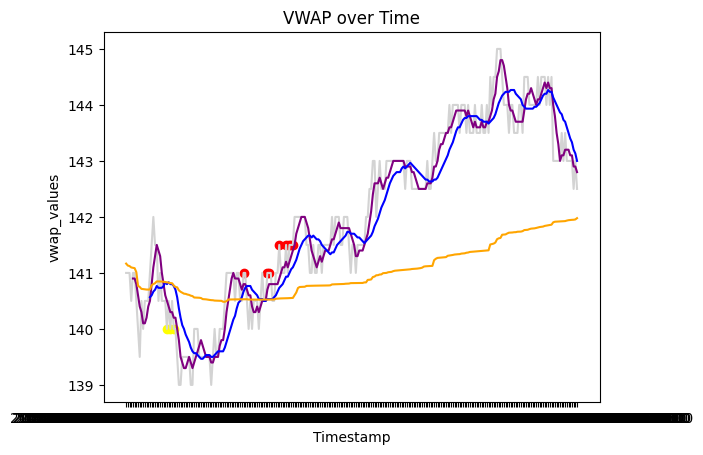

In [319]:
import matplotlib.pyplot as plt

timestamps = [entry['timestamp'] for entry in vwap_list]
vwap_values = [entry['vwap'] for entry in vwap_list]
closeprice_values = [entry['closeprice'] for entry in vwap_list]
MA_list_short_values = [entry['MA'] for entry in MA_list_short]
MA_list_long_values = [entry['MA'] for entry in MA_list_long]


plt.scatter(keypoint_buy_indices, [closeprice_values[i] for i in keypoint_buy_indices], color='red', label="整點")
plt.scatter(keypoint_sell_indices, [closeprice_values[i] for i in keypoint_sell_indices], color='yellow', label="整點")

plt.plot(timestamps, closeprice_values, color='lightgray')
plt.plot(timestamps, MA_list_short_values, color='purple')
plt.plot(timestamps, MA_list_long_values, color='blue')
plt.plot(timestamps, vwap_values, color='orange')

plt.xlabel('Timestamp')
#plt.ylabel('VWAP')
plt.ylabel('closeprice_values')
plt.ylabel('vwap_values')
plt.title('VWAP over Time')


In [270]:
tStart = time.time()
# -*- coding:utf-8 -*-
import json
jsonFile = open('F:\\文義\\股票資料\\股票歷史資料\\股票價格Ｋ線(即時)\\台積電\\2330_2024-03-08.json','r')
r = jsonFile.read()
data= json.JSONDecoder().decode(r)
MA_list=indx.calculate_ma(data,5)
MA_list2=indx.calculate_ma(data,15)
tEnd = time.time()
print( (tEnd - tStart))

0.05099987983703613


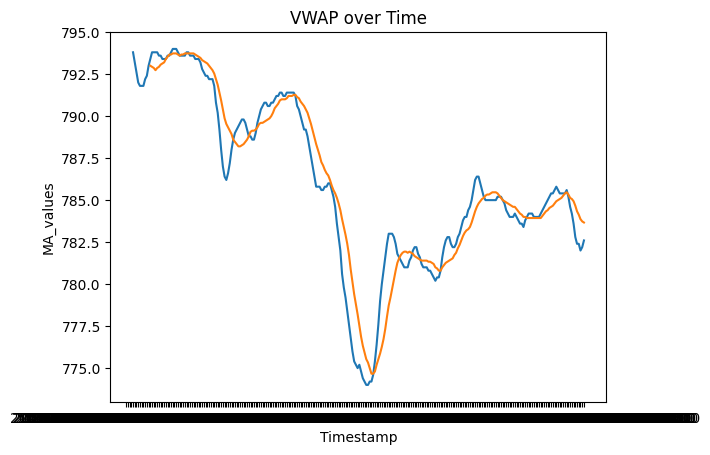

In [52]:
import matplotlib.pyplot as plt

timestamps = [entry['timestamp'] for entry in vwap_list]
vwap_values = [entry['vwap'] for entry in vwap_list]
closeprice_values = [entry['closeprice'] for entry in vwap_list]
MA_values = [entry['MA'] for entry in MA_list]
MA_values2 = [entry['MA'] for entry in MA_list2]

plt.plot(timestamps,MA_values,MA_values2)
plt.xlabel('Timestamp')
#plt.ylabel('VWAP')
plt.ylabel('closeprice_values')
plt.ylabel('MA_values')
plt.title('VWAP over Time')

plt.show()

In [20]:
tStart = time.time()
# -*- coding:utf-8 -*-
import json
jsonFile = open('F:\\文義\\股票資料\\股票歷史資料\\股票價格Ｋ線(即時)\\台積電\\2330_2024-03-08.json','r')
r = jsonFile.read()
data= json.JSONDecoder().decode(r)
EMA_list=indx.calculate_ema(data,15)
tEnd = time.time()
print( (tEnd - tStart))

0.006997823715209961


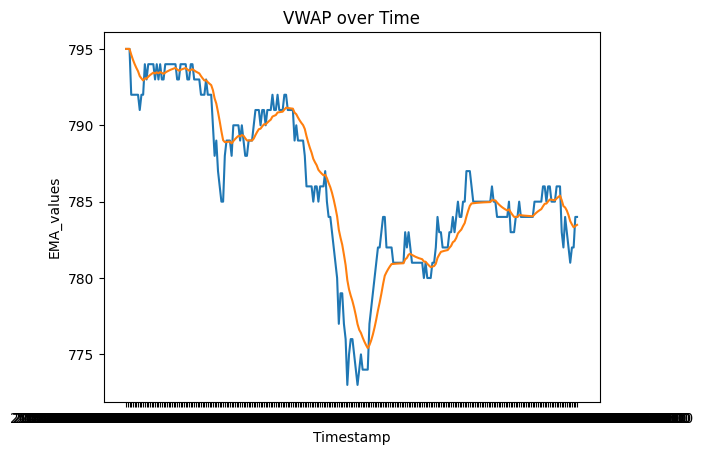

In [21]:
import matplotlib.pyplot as plt

timestamps = [entry['timestamp'] for entry in vwap_list]
vwap_values = [entry['vwap'] for entry in vwap_list]
closeprice_values = [entry['closeprice'] for entry in vwap_list]
EMA_values = [entry['EMA'] for entry in EMA_list]

plt.plot(timestamps, closeprice_values,EMA_values)
plt.xlabel('Timestamp')
#plt.ylabel('VWAP')
plt.ylabel('closeprice_values')
plt.ylabel('EMA_values')
plt.title('VWAP over Time')

plt.show()

In [ ]:
import json
jsonFile = open('F:\\文義\\股票資料\\股票歷史資料\\股票價格Ｋ線(即時)\\台積電\\2330_2024-03-11.json','r')
r = jsonFile.read()
data= json.JSONDecoder().decode(r)
data=data['data']
peaks = []
valleys = []

threshold = 0.3 # 定義閾值
window_size_list = [3,5,10,15,20,30] # 定義窗口大小

#peak定義,由右至左,一段時間Y由最低至最高再到最低的range_y(震幅),X由左至右的range_x(時間) ,

tStart = time.time()

peaks_window=[999]
valleys_window=[999]
for i in range(1, len(data)-1):
    peaks_flag=False
    valleys_flag=False
    for window_size in window_size_list:
        if i-window_size<0:continue
        if i+window_size>len(data)-1:continue  
        diff_prev = (data[i]['close'] - data[i-window_size]['close'])/data[i]['close']
        diff_next = (data[i]['close'] - data[i+window_size]['close'])/data[i]['close']
        if i not in peaks_window:
            if diff_prev >= threshold/100 and diff_next >= threshold/100: 
                peaks_flag=True
                peaks_window=list(range(i-window_size,i+window_size))
                print('peaks_window:'+str(peaks_window))
                break;
        if i not in valleys_window:
            if diff_prev <= -threshold/100 and diff_next <= -threshold/100:
                valleys_flag=True
                valleys_window=list(range(i-window_size,i+window_size))
                print('valleys_window:'+str(valleys_window))
                break;
        
            
    if peaks_flag==True or valleys_flag==True:
        print(i)
        print(data[i-window_size]['close'])
        print(data[i]['close'])
        print(data[i+window_size]['close'])
        print(diff_prev)
        print(diff_next)
        print('*************************')
    
    if peaks_flag==True:peaks.append(data[i])
    if valleys_flag==True:valleys.append(data[i])
    #break;
    
    

print("波峰：")
for peak in peaks:
    print(peak['date'], peak['close'])

print("波谷：")
for valley in valleys:
    print(valley['date'], valley['close'])
    
tEnd = time.time()
print( (tEnd - tStart))    
    
    


#在這個示例中，我們使用了`threshold`變量來指定閾值，並將其設置為5。只有當前後兩個數值之間的差距超過5時，才會被判斷為波峰或波谷。根據需要，您可以調整此閾值以達到想要的效果。

In [ ]:
close_list=[]
for i in range(len(data)):
    cloase_value=data[i]['close']
    close_list.append(cloase_value)
    
threshold = 2 # 定義閾值
window_size = 5 # 定義窗口大小

# 查找所有波峰位置
peaks = [] # 儲存波峰位置的列表
for i in range(1, len(close_list)-1):
    if close_list[i] > close_list[i-1] and close_list[i] > close_list[i+1]:
        peaks.append(i)

# 濾除小波動的波峰
filtered_peaks = [] # 儲存經過濾除後的波峰位置的列表
for peak in peaks:
    left_range=max(close_list[peak]-np.array(close_list[peak-window_size:peak]))
    right_range=max(close_list[peak]-np.array(close_list[peak:peak+window_size]))
    if left_range > threshold and right_range > threshold:
        print(close_list[peak]-np.array(close_list[peak-window_size:peak]))
        print(close_list[peak]-np.array(close_list[peak:peak+window_size]))
        filtered_peaks.append(peak)

print("經過濾除後的波峰位置：", filtered_peaks)

In [ ]:
#預測明日股價區間
#挑選成交值前40名,權值股前20名,高價股前10名股票來進行預測
#支撐壓力:MA,昨日價格(高點低點收盤),區段高點低點,頸線壓力支撐
#考慮目前為多頭或空頭
#量能考慮

In [57]:
#
Path='F:\\文義\\股票資料\\股票歷史資料\\股票價格Ｋ線\\台積電\\D\\'
file_list=['2330_2024.json']

MA_K_5=5
MA_K_10=10
MA_K_20=20
MA_K_60=60

for file in file_list:
    jsonFile = open(Path+file,'r')
    r = jsonFile.read()
    data= json.JSONDecoder().decode(r)
    MA_list_5=indx.calculate_ma(data,MA_K_5)
    MA_list_10=indx.calculate_ma(data,MA_K_10)
    MA_list_20=indx.calculate_ma(data,MA_K_20)
    MA_list_60=indx.calculate_ma(data,MA_K_60)
    MA_5=MA_list_5[MA_K_5-1]['MA']
    MA_10=MA_list_10[MA_K_10-1]['MA']
    MA_20=MA_list_20[MA_K_20-1]['MA']
    MA_60=MA_list_60[MA_K_60-1]['MA']
    close=data['data'][0]['close']
    high=data['data'][0]['high']
    low=data['data'][0]['low']
    
    highest=0
    lowest=9999
    for i in range(MA_K_60-1):
        highest_new=data['data'][i]['high']
        lowest_new=data['data'][i]['low']
        if highest_new>highest:highest=highest_new
        if lowest_new<lowest:lowest=lowest_new
            
    

888
883
879
885
835
837
837
821
838
856
865
866
858
867
843
830
822
834
837
837
811
818
798
796
792
792
786
773
772
790
787
782
765
769
752
740
746
792
793
785
803
817
811
810
792
783
778
783
769
768
768
779
776
779
775
772
752
755
754
914


In [56]:
lowest

740

In [ ]:
cv2.imwrite("d:\\"+'mask.jpg',mask)

In [86]:
mask= cv2.imread("d:\\"+'mask.jpg',0)

In [91]:
np.where(mask>0)

(array([320, 320, 321, ..., 343, 343, 343], dtype=int64),
 array([625, 628, 626, ..., 625, 628, 630], dtype=int64))

In [89]:
Layer_contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [92]:
for i, Layer_contour in enumerate(Layer_contours):
    layerAreanew = cv2.contourArea(Layer_contour)
    print('layerAreanew:'+str(layerAreanew))

layerAreanew:0.0
layerAreanew:0.0
layerAreanew:0.0
layerAreanew:0.0
layerAreanew:0.0
layerAreanew:0.0
layerAreanew:0.0
layerAreanew:0.0
layerAreanew:0.0
layerAreanew:0.0
layerAreanew:0.0
layerAreanew:0.0
layerAreanew:0.0
layerAreanew:2.0
layerAreanew:0.0
layerAreanew:0.0
layerAreanew:0.0
layerAreanew:0.5
layerAreanew:0.0
layerAreanew:0.5
layerAreanew:0.0
layerAreanew:0.0
layerAreanew:595.0
layerAreanew:611.0
layerAreanew:0.0
layerAreanew:543.0


In [95]:
Layer_contour[1]

array([[626, 321]], dtype=int32)

In [97]:
'B' not in 'B,E,D,S,L'

False